# Loading and preprocesing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image 
import os
import cv2
import tensorflow as tf
import random
from tqdm import tqdm 
from skimage.io import imread, imshow
from skimage.transform import resize
from sklearn.model_selection import train_test_split

In [ ]:
dataset_path = "/content/drive/MyDrive/Thesis resources/Datasets/dataset'/Mini_DDSM_Upload"

In [ ]:
benign_imgs = []
path = dataset_path+"/Benign"
valid_images = [".jpg",".gif",".png",".tga"]
count = 0
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue  
    benign_imgs.append(np.asarray(Image.open(os.path.join(path,f))))
    count +=1 
    if count == 100:
      break

In [ ]:
#resizing
resized_bening_imgs = []
for i in range (len(benign_imgs)):
  resized_bening_imgs.append(cv2.resize(benign_imgs[i], (128, 128)))

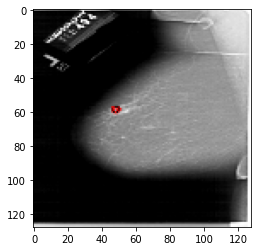

In [ ]:
#showing a sample image 
plt.imshow(resized_bening_imgs[10])


In [ ]:
cancer_imgs = []
path = dataset_path+"/Cancer"
valid_images = [".jpg",".gif",".png",".tga"]
count = 0
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    cancer_imgs.append(np.asarray(Image.open(os.path.join(path,f))))
    count +=1 
    if count == 100:
      break

In [ ]:
#resizing
resized_cancer_imgs = []
for i in range (len(cancer_imgs)):
  resized_cancer_imgs.append(cv2.resize(cancer_imgs[i], (128, 128)))

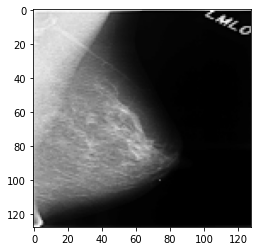

In [ ]:
plt.imshow(resized_cancer_imgs[4])

In [ ]:
normal_imgs = []
path = dataset_path+"/Normal"
valid_images = [".jpg",".gif",".png",".tga"]
count = 0
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    normal_imgs.append(np.asarray(Image.open(os.path.join(path,f))))
    count +=1 
    if count == 100:
      break

In [ ]:
#resizing
resized_normal_imgs = []
for i in range (len(normal_imgs)):
  resized_normal_imgs.append(cv2.resize(normal_imgs[i], (128, 128)))

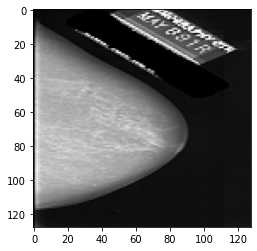

In [ ]:
plt.imshow(resized_normal_imgs[9])

Labeling

In [ ]:
normal_labels = np.full(shape= len(resized_normal_imgs), fill_value=0, dtype=np.int)   # normal label as 0

In [ ]:
benign_labels = np.full(shape= len(resized_bening_imgs), fill_value=1, dtype=np.int)   #bening label as 1

In [ ]:
cancer_labels = np.full(shape= len(resized_cancer_imgs), fill_value=2, dtype=np.int) #cancer label as 2

In [ ]:
print(normal_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
print(benign_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
print(cancer_labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
len(resized_bening_imgs), len(resized_cancer_imgs) , len(resized_normal_imgs)

(100, 100, 100)

In [ ]:
train_images = []
print(len(train_images))
train_images.extend(resized_normal_imgs[:70])
print(len(train_images))
train_images.extend(resized_bening_imgs[:70])
print(len(train_images))
train_images.extend(resized_cancer_imgs[:70])
print(len(train_images))

0
70
140
210


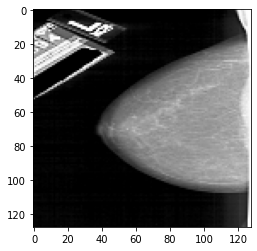

In [ ]:
plt.imshow(train_images[11])

In [ ]:
train_labels = []
print(len(train_labels))
train_labels.extend(normal_labels[:70])
print(len(train_labels))
train_labels.extend(benign_labels[:70])
print(len(train_labels))
train_labels.extend(cancer_labels[:70])
print(len(train_labels))

0
70
140
210


In [ ]:
test_images = []
print(len(test_images))
test_images.extend(resized_normal_imgs[70:])
print(len(test_images))
test_images.extend(resized_bening_imgs[70:])
print(len(test_images))
test_images.extend(resized_cancer_imgs[70:])
print(len(test_images))

0
30
60
90


In [ ]:
test_labels = []
print(len(test_labels))
test_labels.extend(normal_labels[70:])
print(len(test_labels))
test_labels.extend(benign_labels[70:])
print(len(test_labels))
test_labels.extend(cancer_labels[70:])
print(len(test_labels))

0
30
60
90
